# Causal Inferences
## Overview of causal inference
Causal inferences refer to estimates of cause and effect from data. It answers questions of causations and is not just a mere association of variables.  Most models in the application are associative models, however, some causal models lead to accurate predictions.

The biggest problem is that some people draw causal conclusions from associative studies. However, there is a way that associative models or studies can be used to provide accurate causal conclusions.

#### Randomised control trials(RCT)/ Experiments
This is one of the effective ways to design and attain causal conclusions. It involves 3 main stages
* *Randomization*: The population is randomised or sampling methods is designed to randomly select two categories of samples each having all the characteristics of the population. The first group is called the **control group** while the other is the **test group**.
*  *Intervention stage*: A change is then made to the test group. In a clinical trial, the change may be an introduction of a specific drug whose effect is to be determined. On the other hand, the control group is not given the same drug, that is, no change is provided. In clinical trials, only painkillers whose effect is known may be administered.
*  *Conclusion*: Due to the randomization, the effect on the test group is attributed to the intervention made but not other variables that were not controlled.

RCT is the best to lead to causal conclusions, however, it is not used in most cases because:
* It cannot be applied on historical data to deal with past events
* It is unethical, especially in medicine and economics 

RCT, can, however, be implemented when given data and a causal model; the causal model can be provided by a domain expert or inferred from the data. When designing the causal model, the confounding variables are defined so that the effect of one variable should be attributed to the cause and not the confounding variable.

In implementing the causes inferences, the main packages used are `dowhy, EconML` and `Causal-learn` among others.
Documentation of dowhy <a href=https://www.pywhy.org/dowhy/v0.8/example_notebooks/load_graph_example.html>is here</a> or <a href=https://www.pywhy.org/dowhy/v0.8/>this one </a>

**Steps**
1. Model the problem
2. Use the model to identify the Estimand
3. Use the Estimand and data to Estimate the effect
4. Refute the estimate

Read more in <a href="https://causalwizard.app/inference/article/inference">Causal Inference Here</a>

In [2]:
%matplotlib inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dowhy
#from IPython.display import Image, display

#### Question: Does completion of the training programme increase the wages? 
That is, if the training provided the benefits for the participants. Wages in 1978 is the wage 3 years later


In [3]:
lalonde=pd.read_excel('lalonde.xlsx')

In [33]:
lalonde.tail(3)

,ID,Training,Age,Education_years,Married,No_Degree,Wage_1974,Wage_1975,Wage_1978
442,442,True,35,9,1,1,13602.43,13830.64,12803.970
443,443,True,35,8,1,1,13732.07,17976.15,3786.628
444,444,True,33,11,1,1,14660.71,25142.24,4181.942


In [5]:
lalonde.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               445 non-null    int64  
 1   Training         445 non-null    bool   
 2   Age              445 non-null    int64  
 3   Education_years  445 non-null    int64  
 4   Married          445 non-null    int64  
 5   No_Degree        445 non-null    int64  
 6   Wage_1974        445 non-null    float64
 7   Wage_1975        445 non-null    float64
 8   Wage_1978        445 non-null    float64
dtypes: bool(1), float64(3), int64(5)
memory usage: 28.4 KB


#### Step 1
*Describe the Causal Model on Dowhy*

In [9]:
lalonde.shape

In [14]:
lalonde.isna().any() #columns that have null values

ID                 False
Training           False
Age                False
Education_years    False
Married            False
No_Degree          False
Wage_1974          False
Wage_1975          False
Wage_1978          False
dtype: bool

In [15]:
lalonde.isna().any().sum()

0

In [17]:
assert lalonde.isna().any().sum()==0 #True is nothing is displayed

In [25]:
lalonde.dropna(inplace=True) #drop all null values(rows) in the dataframe

In [26]:
lalonde.columns

Index(['ID', 'Training', 'Age', 'Education_years', 'Married', 'No_Degree',
       'Wage_1974', 'Wage_1975', 'Wage_1978'],
      dtype='object')

In [37]:
#First, declare the variables, list all the columns
#create edges: Include all relevant direct effect. Start with the relationships between treatment and outcome(which might not be direct)
#creat other adges as well
#this king of digraph is called the dot disgraph

g="""digraph{
Training;
Age;
Education_years;
Married;
No_Degree;
Wage_1974;
Wage_1975;
Wage_1978;

Training -> Wage_1978;

Education_years -> Training;
Married -> Training;
No_Degree -> Training;
Wage_1974 -> Training;

Education_years -> Wage_1978;
Age -> Wage_1978;
Married -> Wage_1978;
No_Degree -> Wage_1978;
Wage_1974 -> Wage_1978;
Wage_1975 -> Wage_1978;
}"""


In [35]:
#Create the model object
from dowhy import CausalModel

In [38]:
c_model=CausalModel(data=lalonde,
                    treatment='Training',
                    outcome='Wage_1978',
                    graph=g)

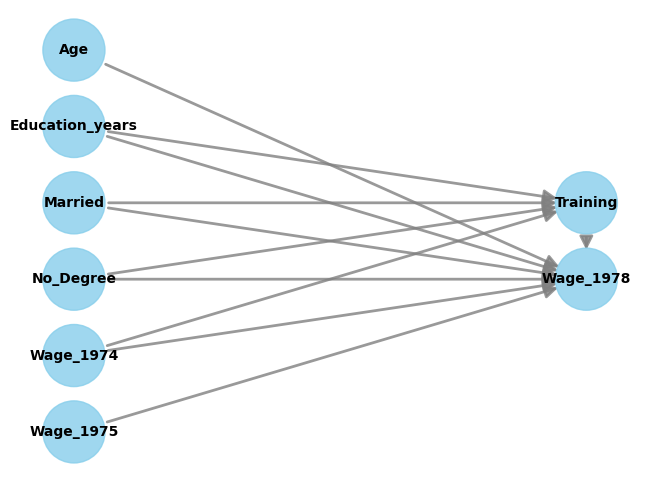

In [39]:
c_model.view_model()
#display(Image(filename="causal_model.png"))

## Identify effect
Identify_effect() produces an **estimand** a way to estimate the desired quantity

**An estimand** is a concept in statistics that defines to the quantity of interest that a researcher aims to estimate using statistical methods. In other words, it is the parameter or population value that the researcher wants to learn about from a particular study.

**ATE: Average Treatment Effect**
It represents the average difference in the outcome variable between a group of subjects who received the treatment and a group of subjects who did not receive the treatment, in the entire population

$$ATE = E[Y(1)] - E[Y(0)]$$

where Y(1) is the outcome variable for the treatment group, Y(0) is the outcome variable for the control gro

**CATE: Conditional Average Treatment Effect**
Refers to the difference in the expected value of the outcome variable between two groups of individuals who differ only in their treatment status, but are otherwise similar in terms of their observed characteristics or covariatesup

In [40]:
identified_estimand=c_model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                               
───────────(E[Wage_1978|Married,No_Degree,Wage_1974,Education_years])
d[Training]                                                          
Estimand assumption 1, Unconfoundedness: If U→{Training} and U→Wage_1978 then P(Wage_1978|Training,Married,No_Degree,Wage_1974,Education_years,U) = P(Wage_1978|Training,Married,No_Degree,Wage_1974,Education_years)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



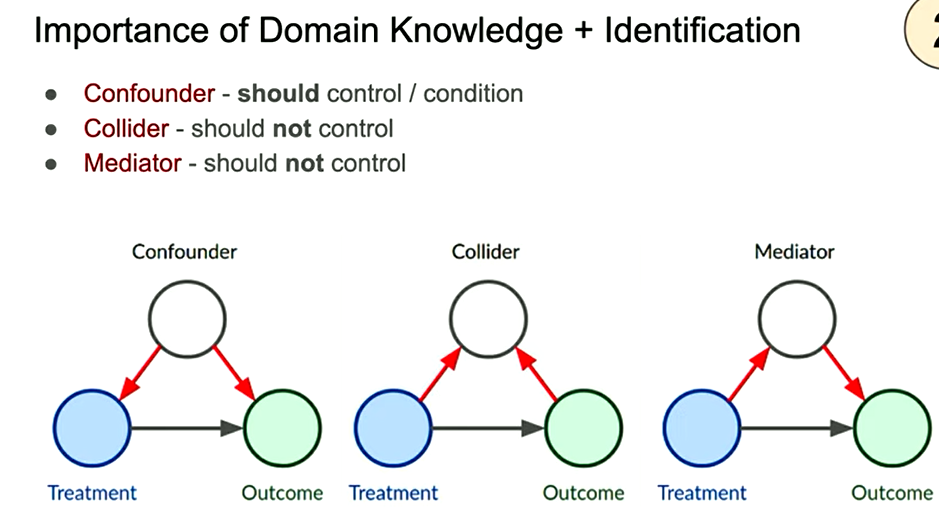

### Estimating the effect

In [41]:
estimate=c_model.estimate_effect(identified_estimand,
                               method_name='backdoor.linear_regression',
                               target_units="ate",
                               effect_modifiers=[],
                               confidence_intervals=True,
                               test_significance=True) 
                              

C:\Users\Fidelis\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [42]:
print(estimate)
#On average, completing the raining course will cause participants to earn $1629 more, than not completing the training
#causal interpretation

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                               
───────────(E[Wage_1978|Married,No_Degree,Wage_1974,Education_years])
d[Training]                                                          
Estimand assumption 1, Unconfoundedness: If U→{Training} and U→Wage_1978 then P(Wage_1978|Training,Married,No_Degree,Wage_1974,Education_years,U) = P(Wage_1978|Training,Married,No_Degree,Wage_1974,Education_years)

## Realized estimand
b: Wage_1978~Training+Married+No_Degree+Wage_1974+Education_years
Target units: ate

## Estimate
Mean value: 1653.80737636315
p-value: [0.0098643]
95.0% confidence interval: [[ 399.73750924 2907.87724349]]



### refutation estimate

Refutation is a key concept in causal inference, which refers to the process of testing a hypothesis by attempting to prove it false. 

How confident can we be that the effect is real
Methods include:
- **Bootstrap outcome permutation (statistical significance test):** Measures the probability that the observed effect would occur if the outcomes were random
- **Placebo Treatment Refuter:** Verifies the effect disappears when the Treatment is replaced with a placebo.
- **Random Common Cause Refuter:** Measures the stability of the observed effect given a random common cause of both treatment and outome.e.

In [43]:
refute_plecibo_treatment=c_model.refute_estimate(identified_estimand,estimate,
                                                 method_name="placebo_treatment_refuter",
                                                 plecebo_type="permute")  

C:\Users\Fidelis\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Fidelis\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Fidelis\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

In [44]:
print(refute_plecibo_treatment)

Refute: Use a Placebo Treatment
Estimated effect:1653.80737636315
New effect:-17.039962556443253
p value:0.98



In [ ]:
#P-value more than 95% shows that there is not statistically significant difference between the estimated effect and the new effect since the pa value is more higher than 0.05

In [45]:
estimate.interpret()

Increasing the treatment variable(s) [Training] from 0 to 1 causes an increase of 1653.80737636315 in the expected value of the outcome [['Wage_1978']], over the data distribution/population represented by the dataset.
